# 


# 🖐Project_01 유방암 데이터를 분류 해봅시다.

## 🧡 모듈 정리

In [1]:
# (1) 모듈 임포트
from sklearn.datasets import load_breast_cancer # 데이터셋 불러오기
from sklearn.model_selection import train_test_split # 학습 데이터와 테스트 데이터 분리
from sklearn.metrics import classification_report # 성능 평가 지표
from sklearn.metrics import accuracy_score # 정확도 측정
from sklearn.tree import DecisionTreeClassifier # 의사결정 나무 분류기
from sklearn.ensemble import RandomForestClassifier # 랜덤 포레스트 분류기
from sklearn import svm # 서포트 벡터 머신 분류기
from sklearn.linear_model import SGDClassifier # Stochastic Gradient Descent 분류기
from sklearn.linear_model import LogisticRegression # LogisticRegression 분류기
from sklearn.metrics import confusion_matrix # 오차 정렬
import matplotlib.pyplot as plt #  시각화 모듈
%matplotlib inline 
import pandas as pd # 데이터 프레임 모듈
import warnings
warnings.filterwarnings( 'ignore' ) # 경고 문구 무시

## 💛 데이터셋 준비

In [2]:
# (2) 데이터 준비
breast_cancer = load_breast_cancer()
breast_cancer_data = breast_cancer.data # 학습 해야할 데이터
breast_cancer_label = breast_cancer.target # 정답지 데이터

## 💜데이터셋 👉 데이터 프레임 화 
- pd.DataFrame(data,columns)

In [3]:
breast_cancer_df = pd.DataFrame(data = breast_cancer_data, columns = breast_cancer.feature_names)
breast_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 💚 학습 데이터와 테스트 데이터 분리
- train_test_split(학습 데이터, 정답지, 테스트 데이터 비율, 랜덤 스테이트)

In [4]:
# (3) train, test 데이터 분리
""" """
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data, 
                                                    breast_cancer_label, 
                                                    test_size=0.2, 
                                                    random_state=7)                                                                  

## 💙 (4) 모델 학습 및 예측
- 5가지 모델을 통해 데이터를 학습 해보자!

In [5]:

# (4-1) 모델 학습 및 예측 : DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=32) # 분류 모델 불러오기
decision_tree.fit(X_train, y_train) # 데이터 학습
y_pred = decision_tree.predict(X_test) # 테스트 데이터에 적용
DT = classification_report(y_test, y_pred)
dt_score = accuracy_score(y_test, y_pred)
print('D.T의 성능 평가 지표 ')
print(DT) # 학습한 결과와 정답지 비교
print('-'*100)

# (4-2) 모델 학습 및 예측 : RandomForestClassifier
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
RF = classification_report(y_test, y_pred)
rf_score = accuracy_score(y_test, y_pred)
print('R.F의 성능 평가 지표 ')
print(RF)
print('-'*100)

# (4-3) 모델 학습 및 예측 : svm
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
svm_ = classification_report(y_test, y_pred)
svm_score = accuracy_score(y_test, y_pred)
print('svm의 성능 평가 지표 ')
print(svm_)
print('-'*100)

# (4-4) 모델 학습 및 예측 : SGDClassifier
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)
SGD = classification_report(y_test, y_pred)
sgd_score = accuracy_score(y_test, y_pred)
print('SGD의 성능 평가 지표 ')
print(SGD)
print('-'*100)

# (4-5) 모델 학습 및 예측 : LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
LR = classification_report(y_test, y_pred)
lr_score = accuracy_score(y_test, y_pred)
print('L.R의 성능 평가 지표 ')
print(LR)

D.T의 성능 평가 지표 
              precision    recall  f1-score   support

           0       0.92      0.82      0.87        40
           1       0.91      0.96      0.93        74

    accuracy                           0.91       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114

----------------------------------------------------------------------------------------------------
R.F의 성능 평가 지표 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        74

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114

----------------------------------------------------------------------------------------------------
svm의 성능 평가 지표 
              precision    recall  f1-score   support

           0       1.00      0.72      0.84 

## 🤍 시각화를 통해 결과 비교하기
- matplotlib의 막대 그래프를 통해 어떤 모델의 정확도가 가장 높았는지 비교 해보자!

Text(0.5, 1.0, 'Models Compare')

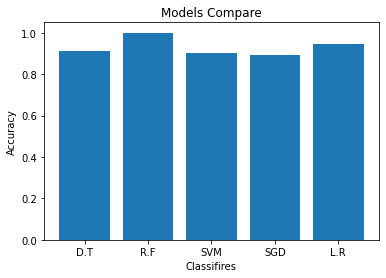

In [6]:
#  각 모델의 정확도 데이터
scores = [dt_score,rf_score,svm_score,sgd_score,lr_score]
names = ['D.T','R.F','SVM','SGD','L.R']

# 그래프 그리기
plt.bar(names,scores)

# 라벨, 타이틀 달기
plt.xlabel('Classifires')
plt.ylabel('Accuracy')
plt.title("Models Compare")

## 😆짧막 회고
- 5개의 분류 모델의 성능 평가를 시각화해 본 결과 유방암 진단에는 R.F모델이 효과적인 모델이라고 볼 수 있겠다.